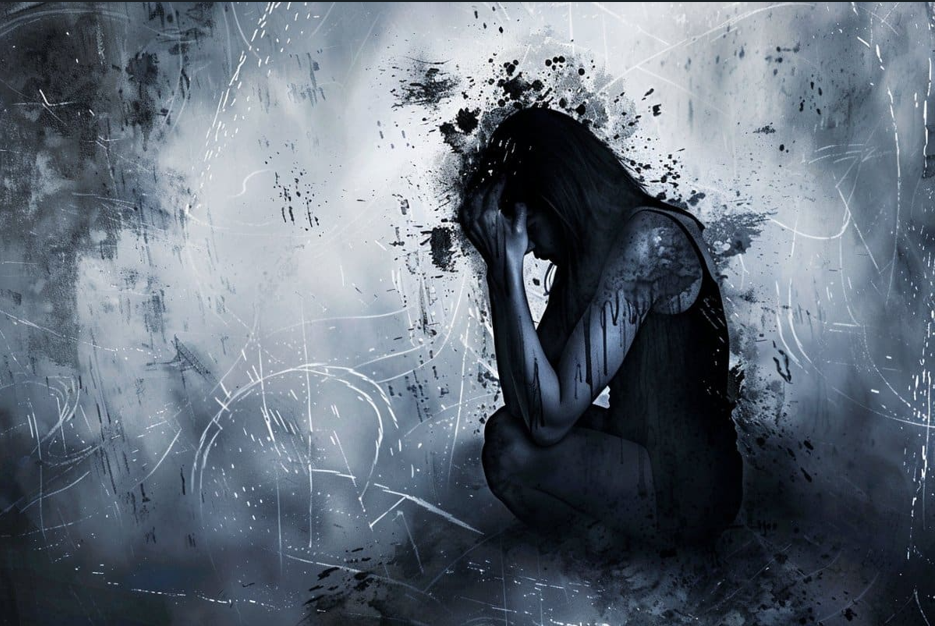

Depression is a growing global health issue, and early identification of individuals at risk is crucial for effective intervention. In this project, I used **unsupervised learning**, specifically the **K-Means clustering algorithm**, to analyze various factors related to lifestyle, mental health history, and physical habits. The main goal was to identify groups of individuals with similar risk patterns for depression, without any predefined labels or diagnosis data.

By leveraging clustering techniques, I aimed to group people based on their common traits, such as **smoking habits**, **alcohol consumption**, **sleep patterns**, and **mental illness history**. This method helps in uncovering hidden patterns in the data, potentially providing insights into which lifestyle combinations are more likely to result in depression. Through this approach, we can better understand at-risk populations, allowing healthcare providers to target interventions more effectively.

This project showcases how unsupervised learning can play a key role in mental health prediction by grouping individuals based on their depression risk factors, even when explicit diagnostic labels are unavailable.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
pd.set_option("display.max_rows", 500)

In [2]:
# Loading the data from csv file to a Pandas DataFrame
df = pd.read_csv("C:\\Users\\DELL\\OneDrive - Questindustries\\Documents\\Data Science\\Juypert Notebooks\\Projects\\CSV File\\depression_data.csv")
df.head(3)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


In [3]:
# Finding the number of rows and columns
print(df.shape)

(1000, 16)


In this dataset have 50000 rows and 16 columns overall.

In [4]:
# Getting some information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Age                           1000 non-null   int64  
 2   Marital Status                1000 non-null   object 
 3   Education Level               1000 non-null   object 
 4   Number of Children            1000 non-null   int64  
 5   Smoking Status                1000 non-null   object 
 6   Physical Activity Level       1000 non-null   object 
 7   Employment Status             1000 non-null   object 
 8   Income                        1000 non-null   float64
 9   Alcohol Consumption           1000 non-null   object 
 10  Dietary Habits                1000 non-null   object 
 11  Sleep Patterns                1000 non-null   object 
 12  History of Mental Illness     1000 non-null   object 
 13  Hist

I check this dataset data type. Everything is good and there is no any null rows also.

In [5]:
df.describe()

,Age,Number of Children,Income
count,1000.000000,1000.000000,1000.000000
mean,49.052000,1.326000,51202.437610
std,17.990357,1.230951,40858.233896
min,18.000000,0.000000,68.900000
25%,33.000000,0.000000,21345.515000
50%,49.500000,1.000000,38576.120000
75%,65.000000,2.000000,76061.160000
max,80.000000,4.000000,209894.250000


In [6]:
# Checking the missing values
print(df.isnull().sum())

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


There is no null values in any rows.

In [7]:
print(df.duplicated().sum())

0


And also there is no any duplicate values.

In [8]:
print(df.columns)

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')


There is have these are have the columns so i focused only healthcare related columns.

In [9]:
df = df.drop(columns='Name',axis=1)
print(df.head(2))

   Age Marital Status    Education Level  Number of Children Smoking Status  \
0   31        Married  Bachelor's Degree                   2     Non-smoker   
1   55        Married        High School                   1     Non-smoker   

  Physical Activity Level Employment Status    Income Alcohol Consumption  \
0                  Active        Unemployed  26265.67            Moderate   
1               Sedentary          Employed  42710.36                High   

  Dietary Habits Sleep Patterns History of Mental Illness  \
0       Moderate           Fair                       Yes   
1      Unhealthy           Fair                       Yes   

  History of Substance Abuse Family History of Depression  \
0                         No                          Yes   
1                         No                           No   

  Chronic Medical Conditions  
0                        Yes  
1                        Yes  


I delete name column because for it is unwanted column for this prediction.

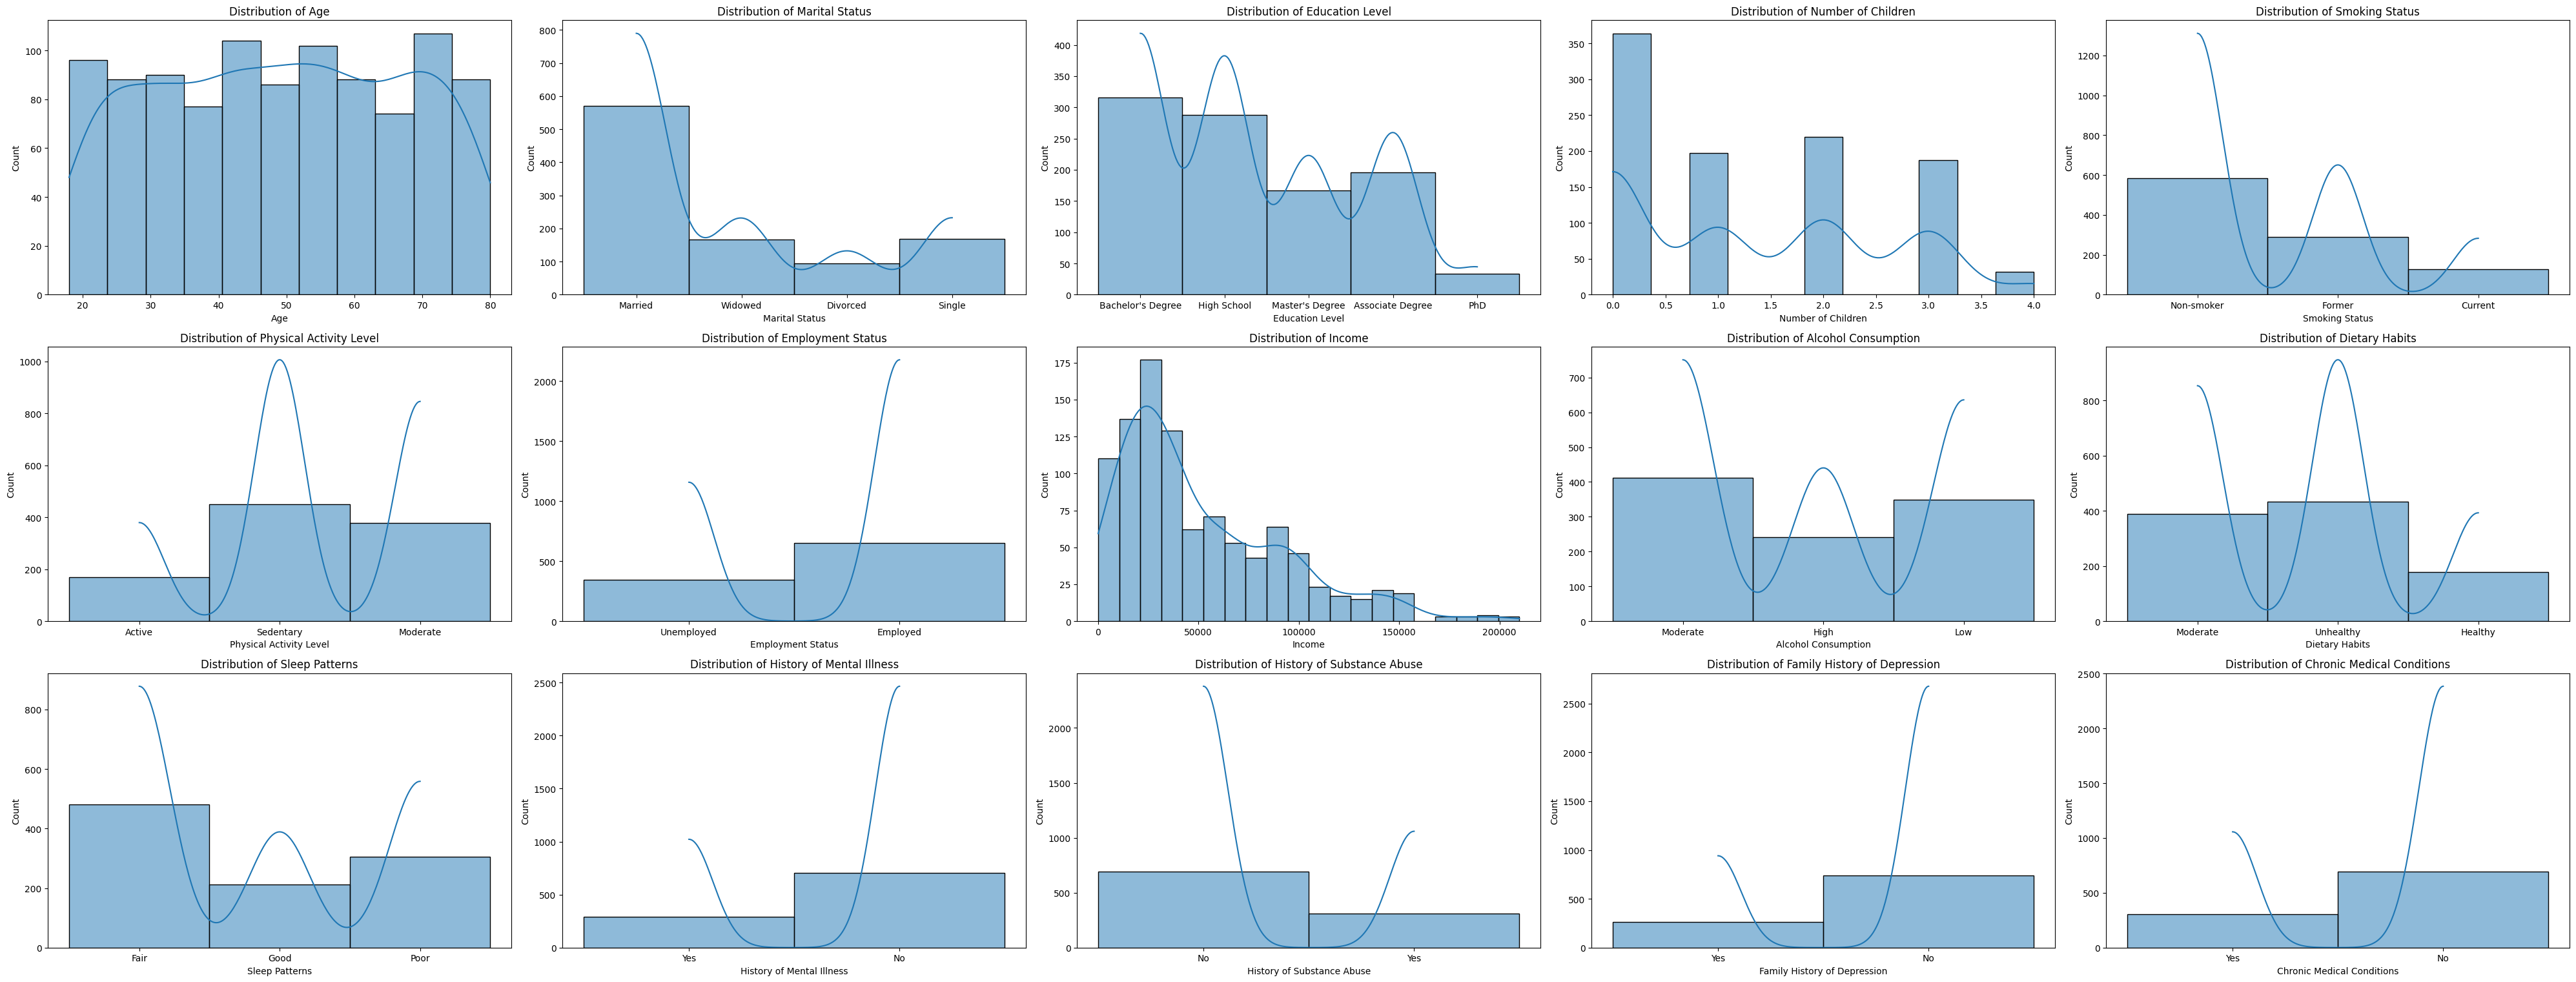

In [10]:
plt.figure(figsize=(40, 25))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[feature], kde=True, legend=df[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

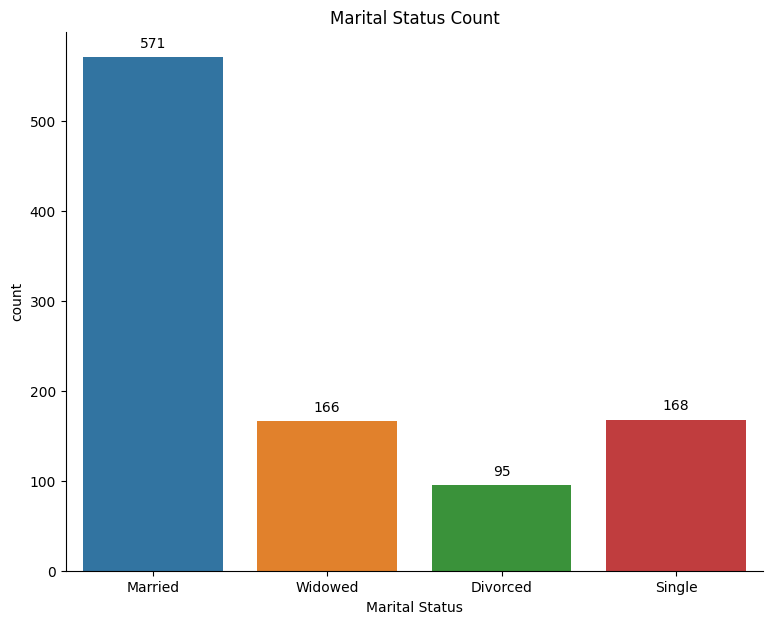

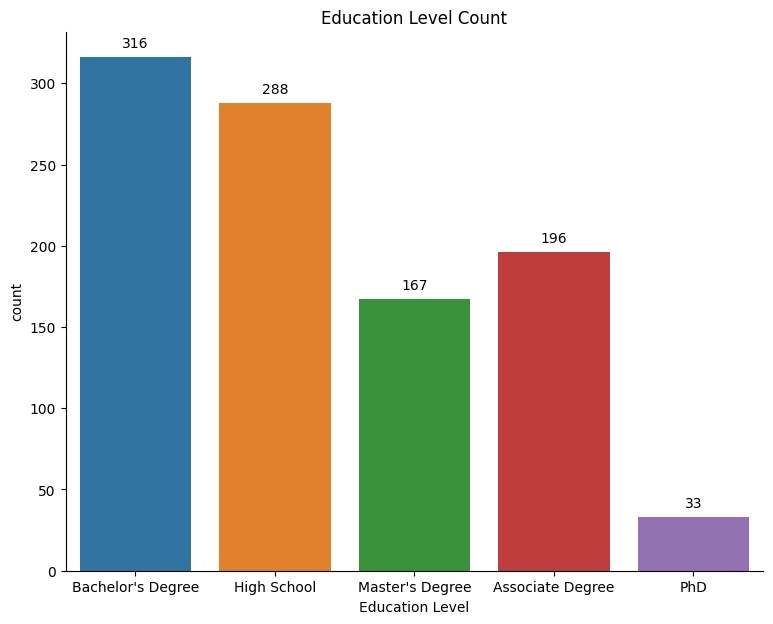

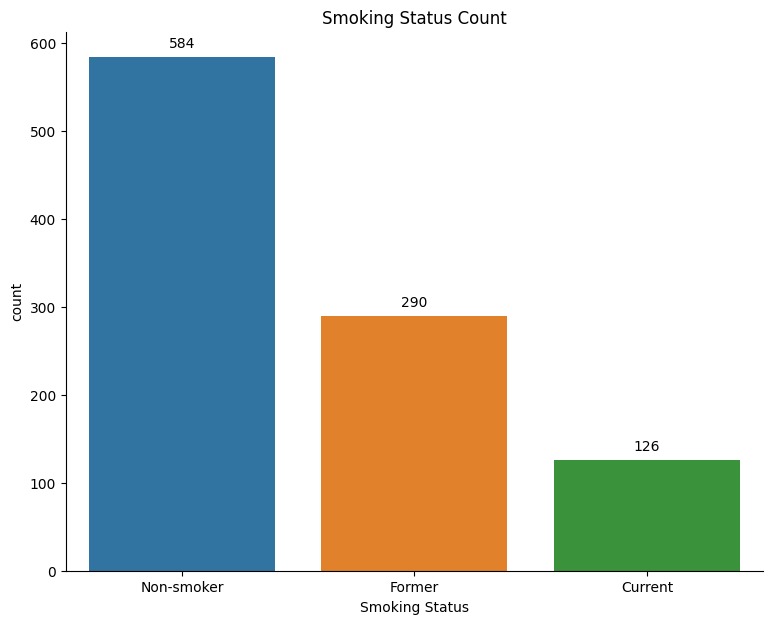

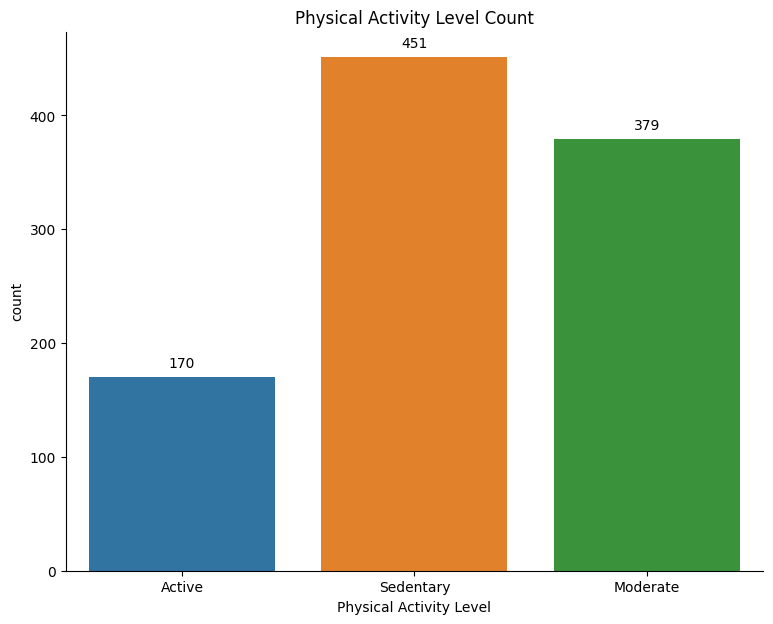

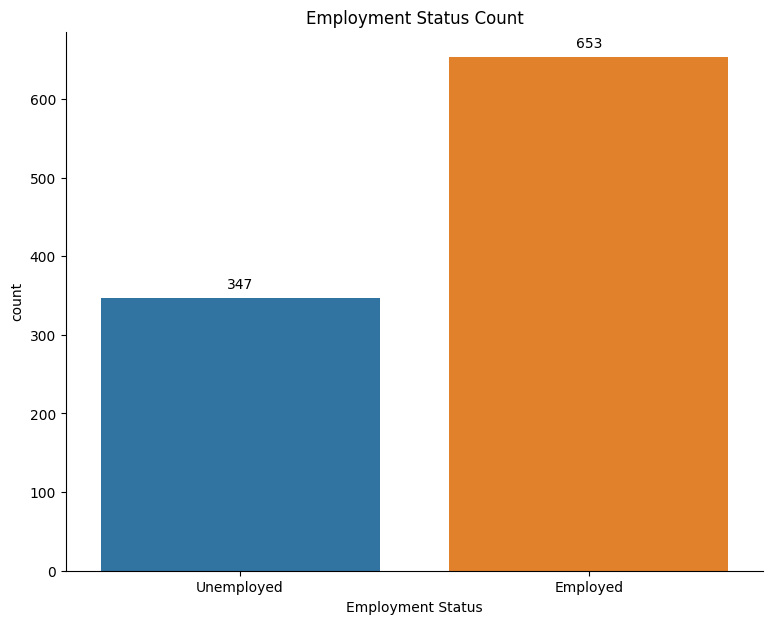

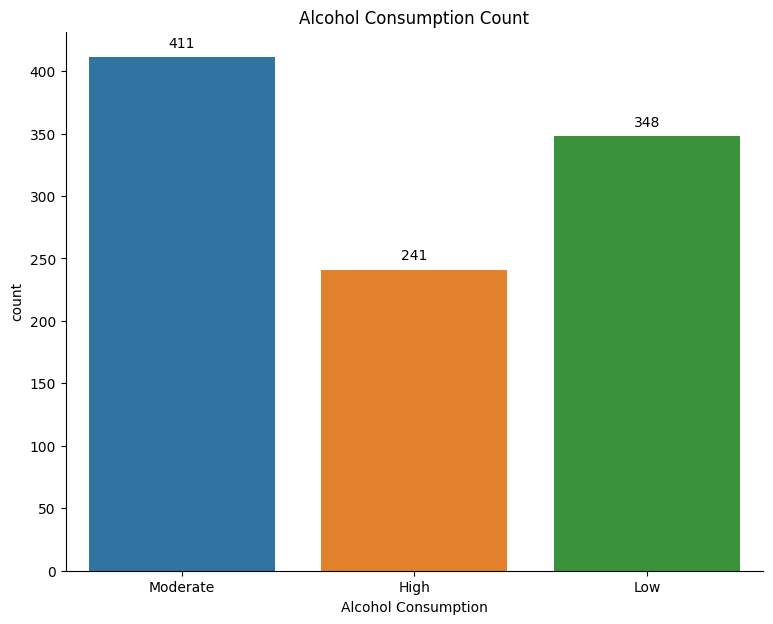

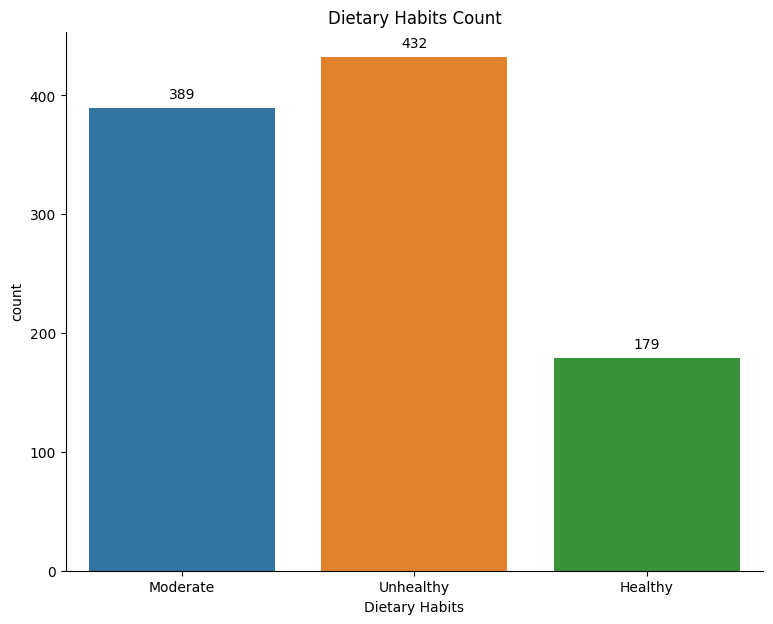

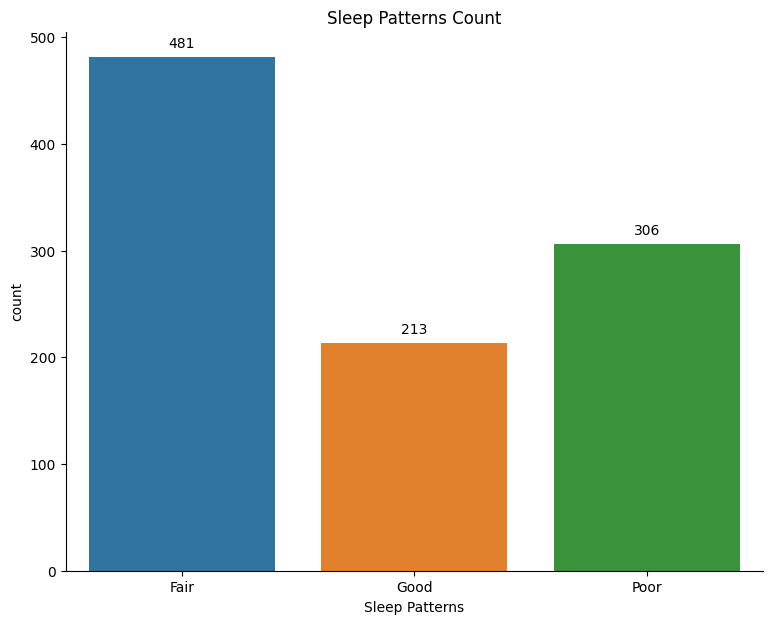

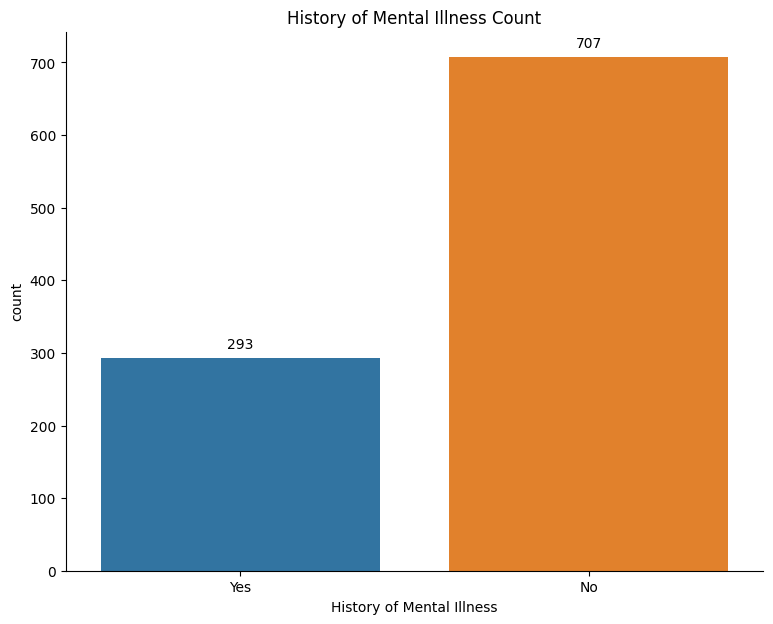

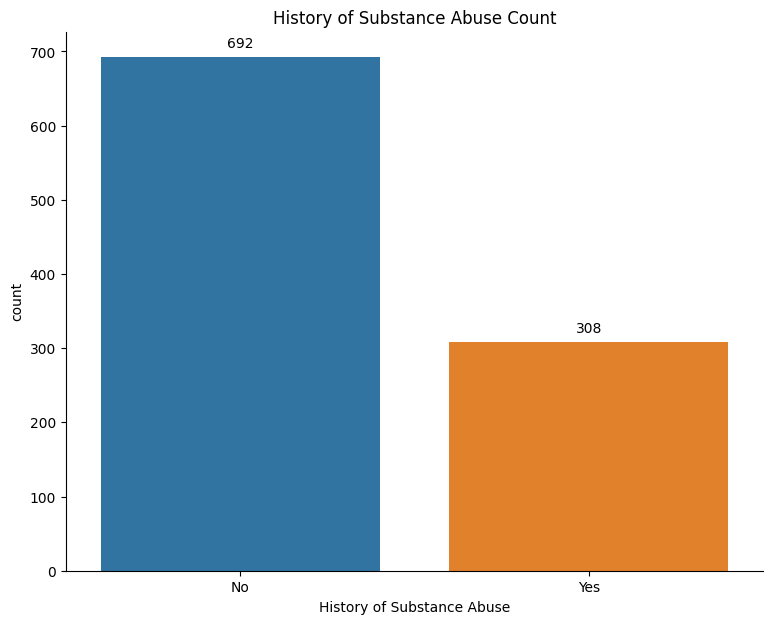

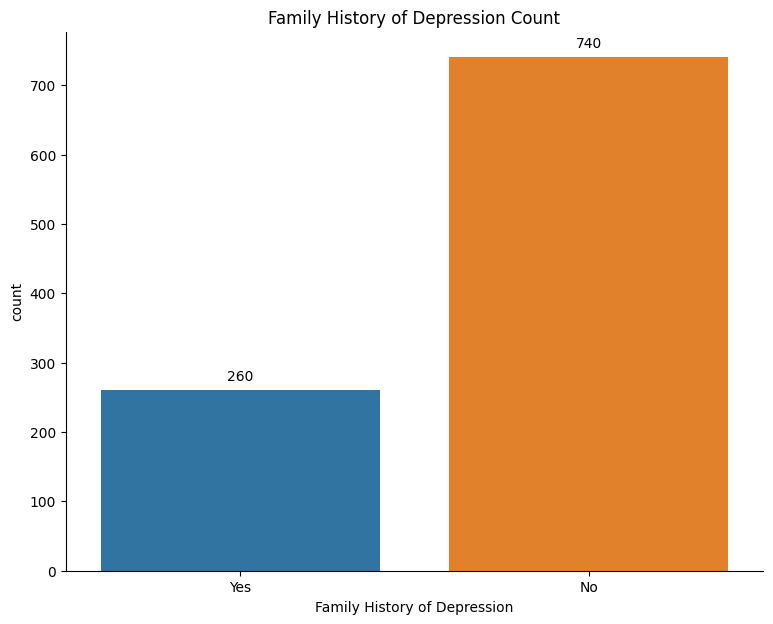

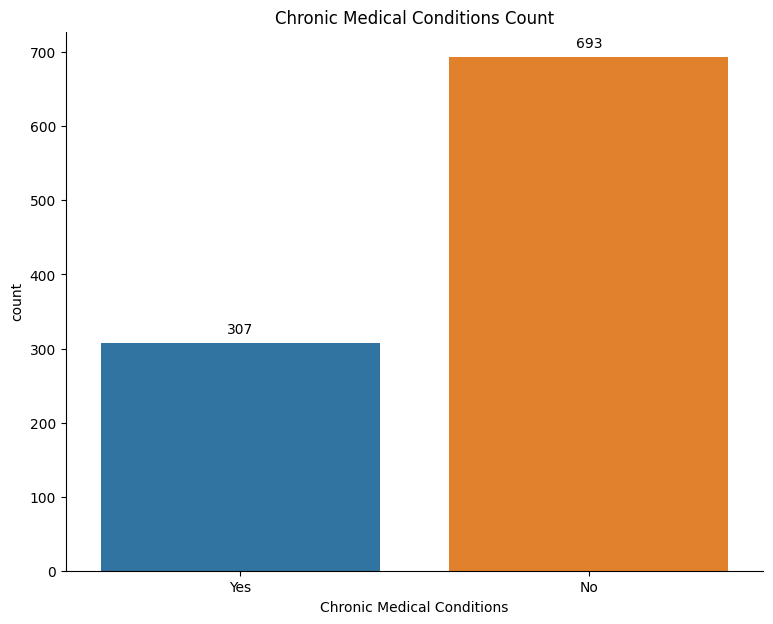

In [11]:
# Loop through each column in the DataFrame
for col in df:
    if df[col].dtype == 'O':   # Check if the column is of object type (categorical)
        plt.figure(figsize=(9, 7))
        ax = sns.countplot(x=col, data=df, hue=col)

        # Add labels to each bar
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
        plt.xticks(fontsize=None, ha='center', rotation=None, fontweight=None)
        plt.title(f"{col} Count")
        plt.show()

In [12]:
df.head(2)

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes


In [13]:
from sklearn.preprocessing import OrdinalEncoder

cols_to_encode = [
    'Marital Status',
    'Education Level',
    'Smoking Status',
    'Physical Activity Level',
    'Employment Status',
    'Alcohol Consumption',
    'Dietary Habits',
    'Sleep Patterns',
    'History of Mental Illness',
    'History of Substance Abuse',
    'Family History of Depression',
    'Chronic Medical Conditions'
]

ordinal_categories = [
    ['Single', 'Married', 'Divorced', 'Widowed'],
    ['High School', "Bachelor's Degree", "Master's Degree", 'Associate Degree', 'PhD'],
    ['Non-smoker', 'Former', 'Current'],
    ['Sedentary', 'Moderate', 'Active'],
    ['Unemployed', 'Employed'],
    ['Low', 'Moderate', 'High'],
    ['Unhealthy', 'Moderate', 'Healthy'],
    ['Poor', 'Good', 'Fair'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes']
]

encoder = OrdinalEncoder(categories=ordinal_categories)
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])

In [14]:
df[cols_to_encode] = df[cols_to_encode].astype(int)

In [15]:
df.head(2)

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,0,2,0,26265.67,1,1,2,1,0,1,1
1,55,1,0,1,0,0,1,42710.36,2,0,2,1,0,0,1


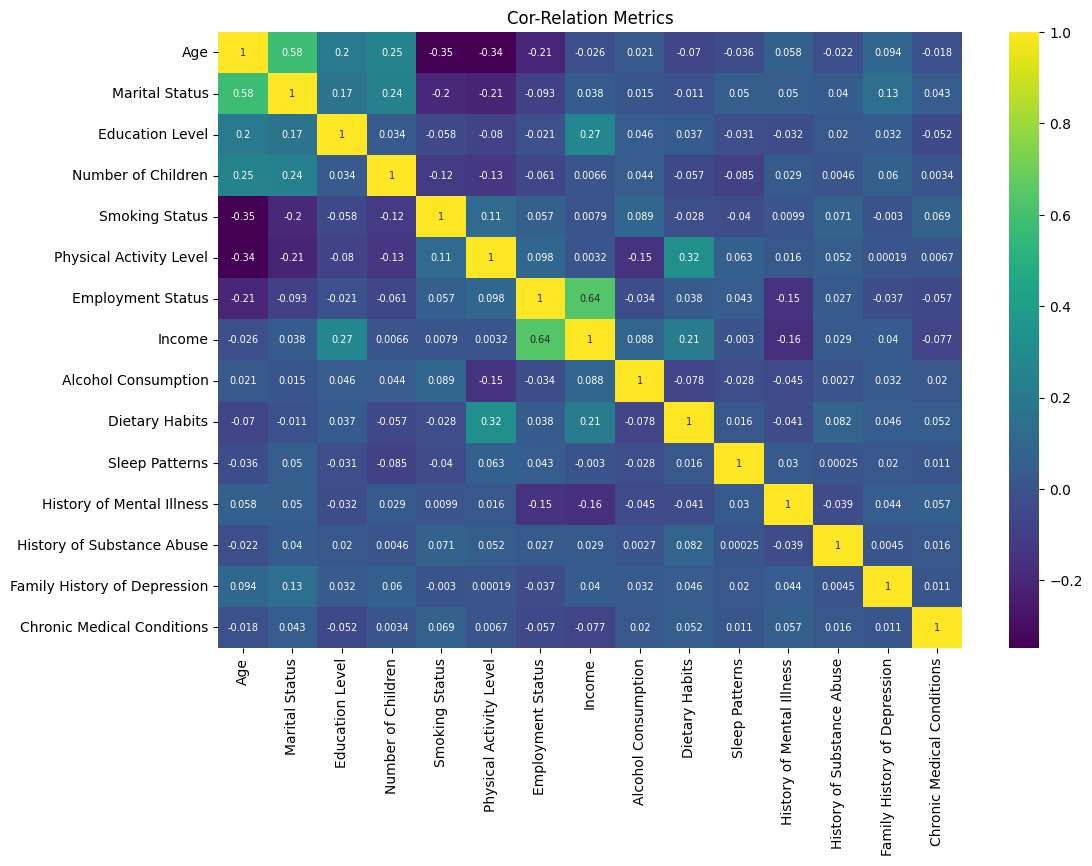

In [16]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':7}, cmap='viridis')
plt.title("Cor-Relation Metrics")
plt.show()

Replace the all the nessesary columns from categeorical to nummerical columns.

In [17]:
# Visualization for Age and Smoking Status.
age_smoking_bar = px.histogram(df, x=df['Age'], color=df['Smoking Status'],
                               text_auto=True, title='Smoking Status across Different Age Groups')
age_smoking_bar.show()

In [18]:
# Visualization for Physical Activity Level and Chronic Medical Conditions.
age_smoking_bar = px.histogram(df, x=df['Physical Activity Level'], color=df['Chronic Medical Conditions'],
                               text_auto=True, title='Physical Activity Level vs. Chronic Medical Conditions')
age_smoking_bar.show()

In [19]:
# Visualization for Income and Education Level.
age_smoking_bar = px.histogram(df, x=df['Income'], color=df['Education Level'],
                               text_auto=True, title='Income Distribution across Education Levels')
age_smoking_bar.show()

In [20]:
# Visualization for Alcohol Consumption and Sleep Patterns.
age_smoking_bar = px.histogram(df, x=df['Alcohol Consumption'], color=df['Sleep Patterns'],
                               text_auto=True, title='Alcohol Consumption vs. Sleep Patterns')
age_smoking_bar.show()

In [21]:
# Visualization for History of Mental Illness and Employment Status.
age_smoking_bar = px.histogram(df, x=df['History of Mental Illness'], color=df['Employment Status'],
                               text_auto=True, title='Employment Status based on History of Mental Illness')
age_smoking_bar.show()

In [22]:
# Visualization for Family History of Depression and Marital Status.
age_smoking_bar = px.histogram(df, x=df['Family History of Depression'], color=df['Marital Status'],
                               text_auto=True, title='Family History of Depression based on Marital Status')
age_smoking_bar.show()

In [23]:
# Finding wcss value for different number of clusters

wcss = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(df)   
    wcss.append(kmeans.inertia_)

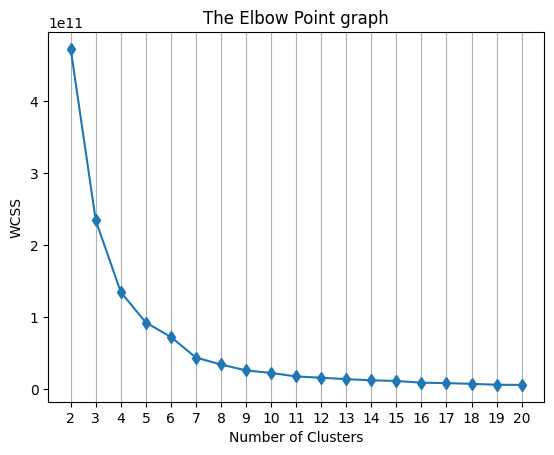

In [24]:
# Plot an elbow graph
plt.plot([i for i in range(2, 21)], wcss, marker="d")
plt.xticks([i for i in range(2, 21)])
plt.title("The Elbow Point graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(axis="x")
plt.show()

In [25]:
# Applying KMeans

kmeans = KMeans(n_clusters=3, init="random", n_init="auto")
df['Cluster'] = kmeans.fit_predict(df)
print("Cluster sizes:\n",df['Cluster'].value_counts())

Cluster sizes:
 Cluster
2    611
0    298
1     91
Name: count, dtype: int64


In [26]:
silhouette_score(df, kmeans.labels_)

0.6413382152891879

In [27]:
ss = []
no_c = [j for j in range(2,21)]

for i in range(2,21):
    km1 = KMeans(n_clusters=i, init="random", n_init="auto")
    km1.fit_predict(df)
    ss.append(silhouette_score(df, km1.labels_))

ss

[0.666966009013195,
 0.6413382152891879,
 0.5864359401564703,
 0.5562732023563856,
 0.584765520817268,
 0.5398568547369123,
 0.5851271383102905,
 0.5697185785981921,
 0.5682634655535632,
 0.553989633201749,
 0.5553492734709412,
 0.559304751099171,
 0.5582543922002576,
 0.5520175522608134,
 0.5497166979919407,
 0.56681225715333,
 0.5680188053014582,
 0.5499295037185933,
 0.5525334819996408]

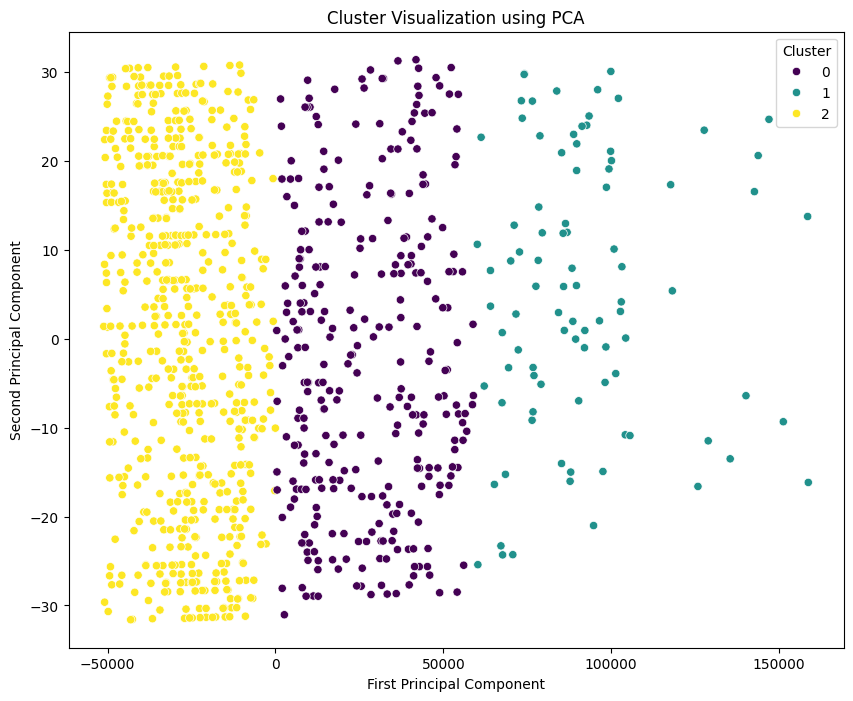

In [28]:
# Applying PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(df)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [29]:
score = silhouette_score(df, df['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6413382152891879


In [30]:
nfeatures = ['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions',
       'Cluster']

In [31]:
cluster_means = df.groupby('Cluster')[nfeatures].mean()
print("Cluster means:\n",cluster_means)

Cluster means:
                Age  Marital Status  Education Level  Number of Children  \
Cluster                                                                   
0        46.617450        1.184564         1.483221            1.275168   
1        53.197802        1.604396         2.505495            1.461538   
2        49.621931        1.243863         1.145663            1.330606   

         Smoking Status  Physical Activity Level  Employment Status  \
Cluster                                                               
0              0.570470                 0.775168           1.000000   
1              0.461538                 0.615385           1.000000   
2              0.540098                 0.707038           0.432079   

                Income  Alcohol Consumption  Dietary Habits  Sleep Patterns  \
Cluster                                                                       
0         78543.715705             0.902685        0.993289        1.174497   
1        142919

In [32]:
cluster_0 = cluster_means.iloc[0]
cluster_1 = cluster_means.iloc[1]
cluster_2 = cluster_means.iloc[2]
print("Cluster Interpretation:")

# Initialize variables
high_risk_cluster = None
average_risk_cluster = None
low_risk_cluster = None

if cluster_0['History of Mental Illness'] > cluster_1['History of Mental Illness']:
    high_risk_cluster = 0
    average_risk_cluster = 1
    low_risk_cluster = 2
elif cluster_1['History of Mental Illness'] > cluster_2['History of Mental Illness']:
    high_risk_cluster = 1
    average_risk_cluster = 2
    low_risk_cluster = 0
else:
    high_risk_cluster = 1
    average_risk_cluster = 2
    low_risk_cluster = 0

print(f"Cluster {high_risk_cluster} may represent individuals at higher risk of depression.")
print(f"Cluster {average_risk_cluster} may represent individuals at average risk of depression.")
print(f"Cluster {low_risk_cluster} may represent individuals at lower risk of depression.")

Cluster Interpretation:
Cluster 1 may represent individuals at higher risk of depression.
Cluster 2 may represent individuals at average risk of depression.
Cluster 0 may represent individuals at lower risk of depression.


In [33]:
df['Depression_Risk'] = df['Cluster'].map({high_risk_cluster: 'High Risk', average_risk_cluster: 'Average Risk', low_risk_cluster: 'Low Risk'})

In [34]:
print("Sample of results:")
print(df[['Age', 'Income', 'History of Mental Illness', 'Family History of Depression', 'Depression_Risk']].sample(10))

Sample of results:
     Age     Income  History of Mental Illness  Family History of Depression  \
674   65    4518.38                          1                             0   
767   57   47544.24                          1                             1   
784   20   13382.05                          0                             0   
336   21   59183.80                          0                             1   
342   61  209701.03                          0                             0   
379   73   10539.86                          1                             0   
950   65    5326.36                          0                             0   
585   72    2154.82                          1                             0   
63    71  140015.25                          0                             1   
26    27   68139.93                          0                             0   

    Depression_Risk  
674    Average Risk  
767    Average Risk  
784    Average Risk  
336        L

In [35]:
df['Depression_Risk'].value_counts()

Depression_Risk
Average Risk    611
Low Risk        298
High Risk        91
Name: count, dtype: int64

In [36]:
df.to_csv('depression_risk_prediction.csv', index=False)
print("Full results saved to 'depression_risk_prediction.csv'")

Full results saved to 'depression_risk_prediction.csv'
